# Image classifier

Apparently augmentation transformations don't work in OSX ARM64.

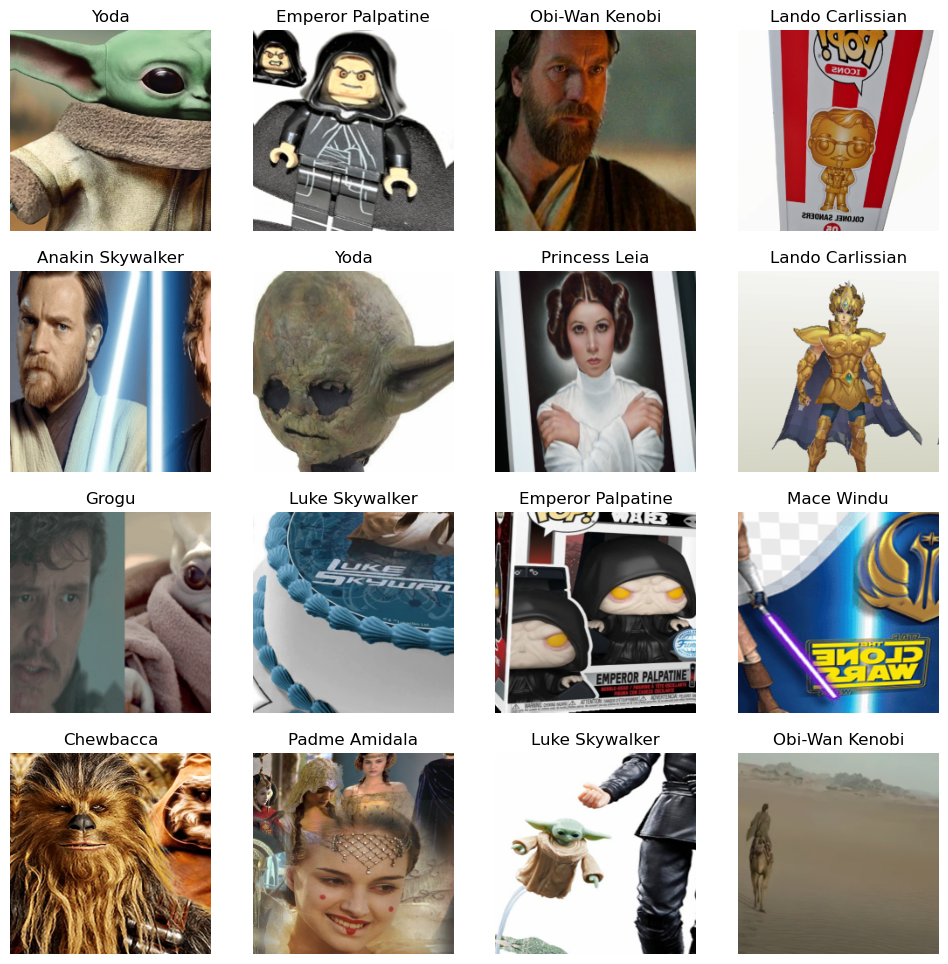

In [ ]:
from fastai.vision.all import *

star_wars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(460, min_scale=0.3),
    batch_tfms=aug_transforms(size=230))

characters_path = Path('star-wars-characters') 
dls = star_wars.dataloaders(characters_path)

dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10, 0.008)

/Users/anssi/mambaforge/envs/fastai_deep/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/anssi/mambaforge/envs/fastai_deep/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,3.122440,1.946134,0.471347,01:37


epoch,train_loss,valid_loss,error_rate,time
0,1.634526,1.268260,0.332378,02:02
1,1.325752,1.413202,0.352436,02:01
2,1.241128,1.439565,0.336676,02:03
3,1.162474,1.318937,0.330946,02:04
4,1.026057,1.008692,0.246418,02:09
5,0.816910,1.023259,0.250716,02:14
6,0.631065,0.975081,0.226361,02:22
7,0.472325,0.800443,0.184814,02:05
8,0.364827,0.816589,0.189112,02:10
9,0.296648,0.810935,0.186246,02:12


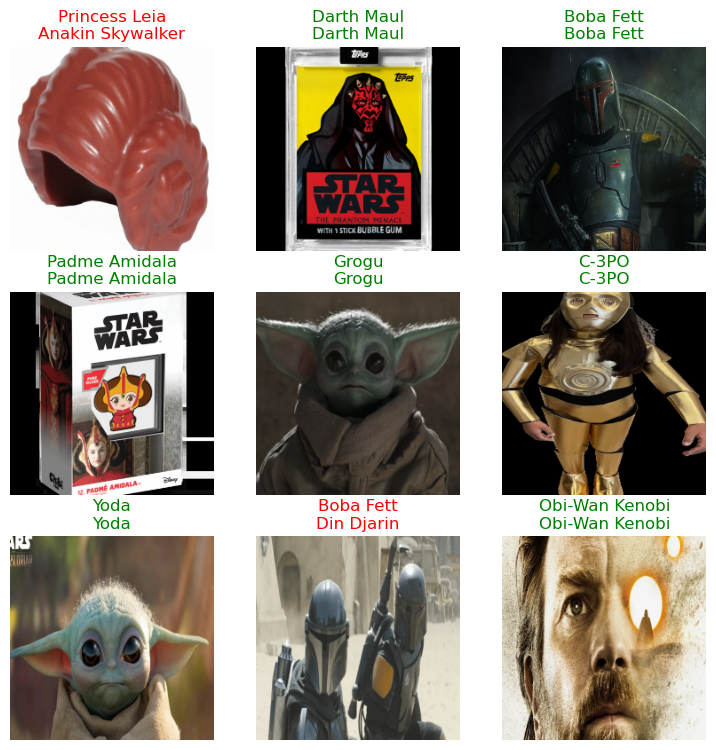

In [ ]:
learn.show_results()

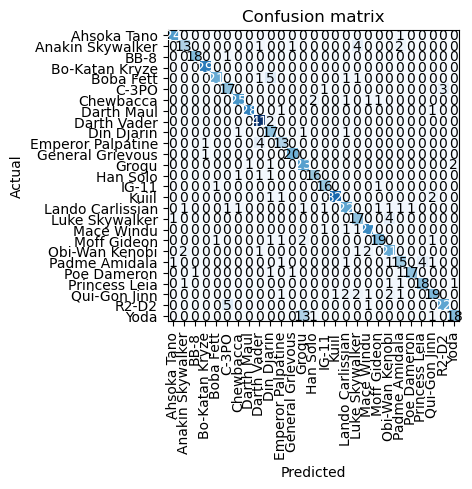

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

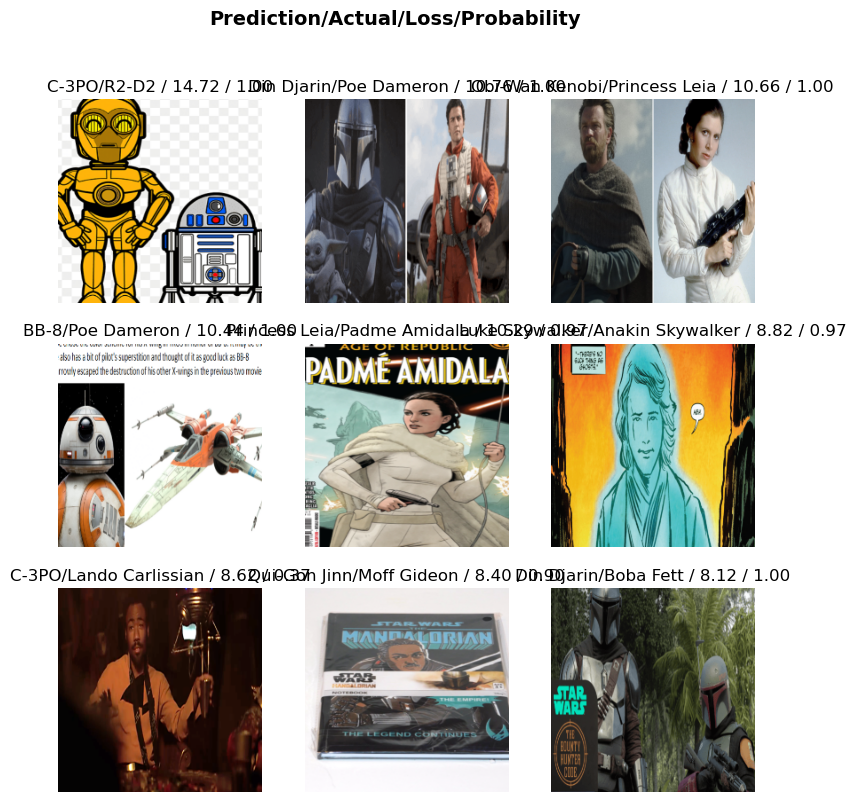

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

NameError: name 'ImageClassifierCleaner' is not defined